We aim to build a machine learning model using K-Nearest Neighbors (KNN) for handwritten digit recognition

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from sklearn.datasets import fetch_openml

In [13]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [14]:
X, y = mnist['data'], mnist['target']

In [15]:
print(f"Feature shape: {X.shape}")
print(f"Label shape: {y.shape}")

Feature shape: (70000, 784)
Label shape: (70000,)


In [16]:
print("Sample labels:", y[:10])

Sample labels: ['5' '0' '4' '1' '9' '2' '1' '3' '1' '4']


Data Exploration (EDA)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6920\4203494294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()), palette="viridis")


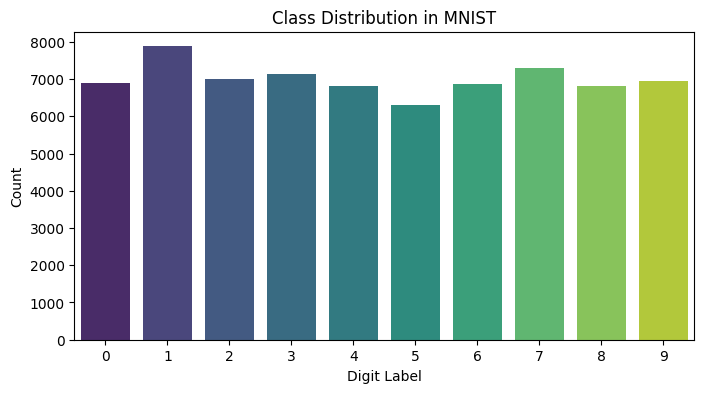

In [22]:
plt.figure(figsize=(8,4))
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()), palette="viridis")
plt.title("Class Distribution in MNIST")
plt.xlabel("Digit Label")
plt.ylabel("Count")
plt.show()

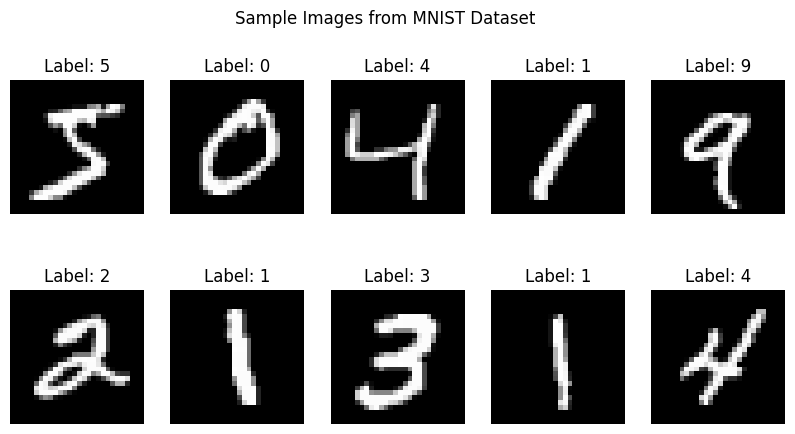

In [23]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.suptitle("Sample Images from MNIST Dataset")
plt.show()

In [25]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
np.isnan(X).sum()

0

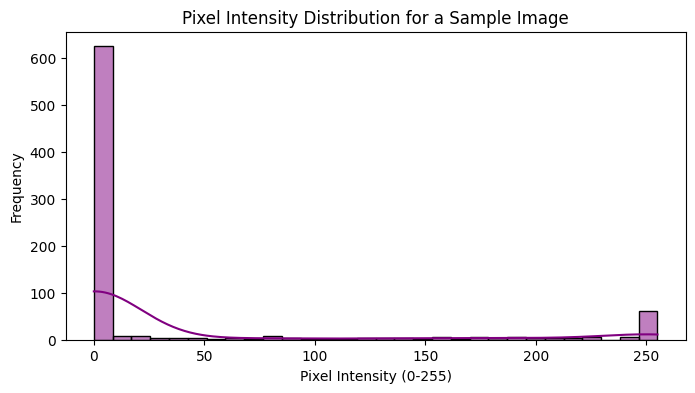

In [27]:
plt.figure(figsize=(8, 4))
sns.histplot(X[0], bins=30, kde=True, color='purple')
plt.title("Pixel Intensity Distribution for a Sample Image")
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency")
plt.show()

Data Preprocessing

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
)

In [33]:
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (56000, 784)
Testing set shape: (14000, 784)


In [34]:
preprocessing_pipeline = Pipeline([
    ('scaler', MinMaxScaler())  # Scale pixel values from 0-255 to 0-1
])

In [35]:
X_train_scaled = preprocessing_pipeline.fit_transform(X_train)
X_test_scaled = preprocessing_pipeline.transform(X_test)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn_model = KNeighborsClassifier(
    n_neighbors=3,      # Number of neighbors (can tune later)
    weights='distance', # Closer neighbors have higher influence
    n_jobs=-1           # Use all cores for faster computation
)

In [40]:
knn_Model = Pipeline([
    ('scaler', MinMaxScaler()),      # Preprocessing: scale pixel values to [0,1]
    ('knn', knn_model)               # Modeling: KNN classifier
])

In [43]:
knn_Model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn',
                 KNeighborsClassifier(n_jobs=-1, n_neighbors=3,
                                      weights='distance'))])

In [44]:
y_pred = knn_Model.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print(f" Test Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

 Test Accuracy: 97.29%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.96      0.99      0.98      1600
           2       0.98      0.96      0.97      1380
           3       0.97      0.96      0.97      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.98      0.97      1503
           8       0.99      0.94      0.96      1357
           9       0.96      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



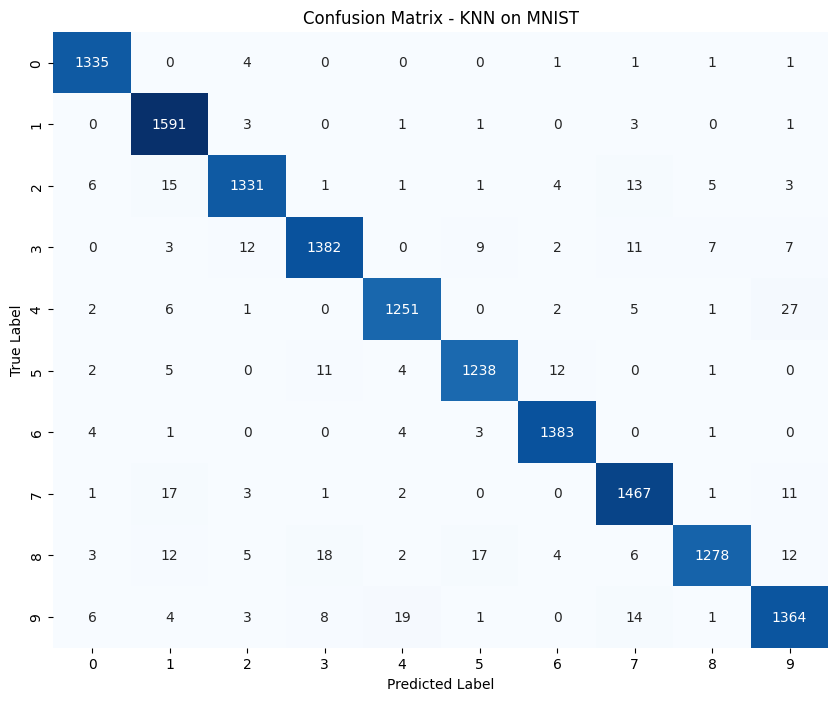

In [47]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.title("Confusion Matrix - KNN on MNIST")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Hyperparameter Tuning

In [52]:
import joblib
joblib.dump(knn_model, 'knn_model.pkl')


['knn_model.pkl']